#Notebook 3 - Linear Regression with SGD solver

In [1]:
################################## MODIFY PATHS TO RUN THE NOTEBOOK #########################################
data_folder = '/content/drive/Othercomputers/My Laptop/סמסטר א/למידה חישובית למדעי המוח/final project/data/'
code_folder = '/content/drive/Othercomputers/My Laptop/סמסטר א/למידה חישובית למדעי המוח/final project/code/'
##############################################################################################################

# mount drive:
from google.colab import drive
drive.mount('/content/drive')


# imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sk:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

# utilities:
from copy import deepcopy
from itertools import product
import pickle
from google.colab import drive


# unpack original data pkl:
with open(data_folder + 'processed_data_v1.pkl', 'rb') as f:
    data = pickle.load(f)
X_train1, X_val1, X_test1  = data['X_train'], data['X_val'], data['X_test']

# unpack f_regression feature seoection pkl:
with open(data_folder + 'processed_data_v2.pkl', 'rb') as f:
    data = pickle.load(f)
X_train2, X_test2, X_val2, y_train, y_val, y_test = data['X_train'], data['X_val'], data['X_test'], data['y_train'], data['y_val'], data['y_test']

# unpack pca pkl:
with open(data_folder + 'processed_data_v3.pkl', 'rb') as f:
    data = pickle.load(f)
X_train_pca, X_val_pca, X_test_pca  = data['X_train'], data['X_val'], data['X_test']

# import custom functions:
import sys
sys.path.append(code_folder)
from ml_final_project_functions import scale_numeric_and_tfidf, grid_search, plot_predictions

Mounted at /content/drive


In [ ]:
# SGD regressor:   (V3 - pca dataset)
sgd = SGDRegressor(random_state=42, max_iter=100000)

# hyperparameters:
param_grid = {'loss': ['squared_error'],                 # note - we ran a more roubust grid search before running this search.
              'penalty': ['l1'],                         # we also tried to run the model not only on the pca dataset.
              'alpha': np.linspace(1, 10, 10),
              'eta0': np.linspace(0.0001, 0.001, 10),
              'learning_rate': ['invscaling'],
              'fit_intercept': [True],
              'early_stopping': [True],
              }

# grid search:
results, best_model = grid_search(param_grid, sgd, X_train_pca, y_train, X_val_pca, y_val, verbose=20)

fitting 100 hyperparameters combinations
iteration number 20
iteration number 40
iteration number 60
iteration number 80
iteration number 100

best mse is 31876.54
best params:
 (('loss', 'squared_error'), ('penalty', 'l1'), ('alpha', 4.0), ('eta0', 0.0003), ('learning_rate', 'invscaling'), ('fit_intercept', True), ('early_stopping', True))


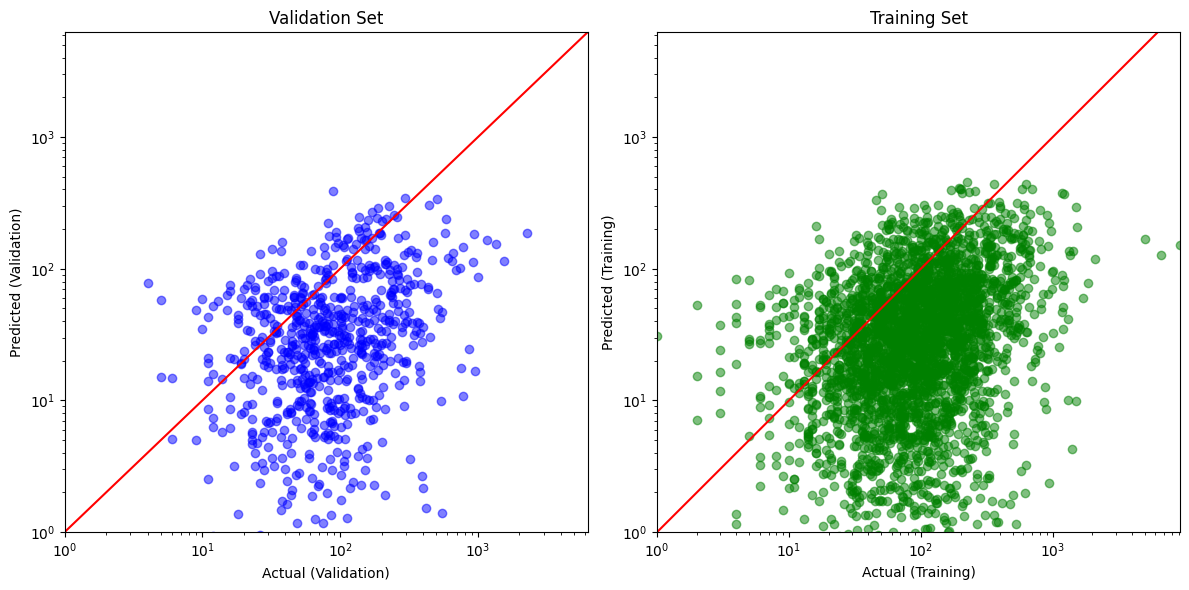

In [ ]:
# plot:
y_train_pred = best_model.predict(X_train_pca)
y_val_pred = best_model.predict(X_val_pca)
plot_predictions(y_train, y_train_pred, y_val, y_val_pred)

In [ ]:
results

,params,r2 train,mse train,r2 val,mse val
259,"((loss, squared_error), (penalty, elasticnet),...",0.071541,43945.807771,0.079917,31863.785809
359,"((loss, squared_error), (penalty, elasticnet),...",0.070286,44005.191782,0.079891,31864.677362
269,"((loss, squared_error), (penalty, elasticnet),...",0.071900,43928.817669,0.079813,31867.373540
158,"((loss, squared_error), (penalty, elasticnet),...",0.071783,43934.339655,0.079808,31867.558808
249,"((loss, squared_error), (penalty, elasticnet),...",0.070797,43981.029417,0.079801,31867.786640
...,...,...,...,...,...
861,"((loss, squared_error), (penalty, elasticnet),...",-0.268902,60059.646170,-0.383661,47918.135580
660,"((loss, squared_error), (penalty, elasticnet),...",-0.270837,60151.240276,-0.385017,47965.079794
382,"((loss, squared_error), (penalty, elasticnet),...",-0.525677,72213.330578,-0.726787,59801.070818
190,"((loss, squared_error), (penalty, elasticnet),...",-0.650799,78135.570009,-0.896810,65689.204545
